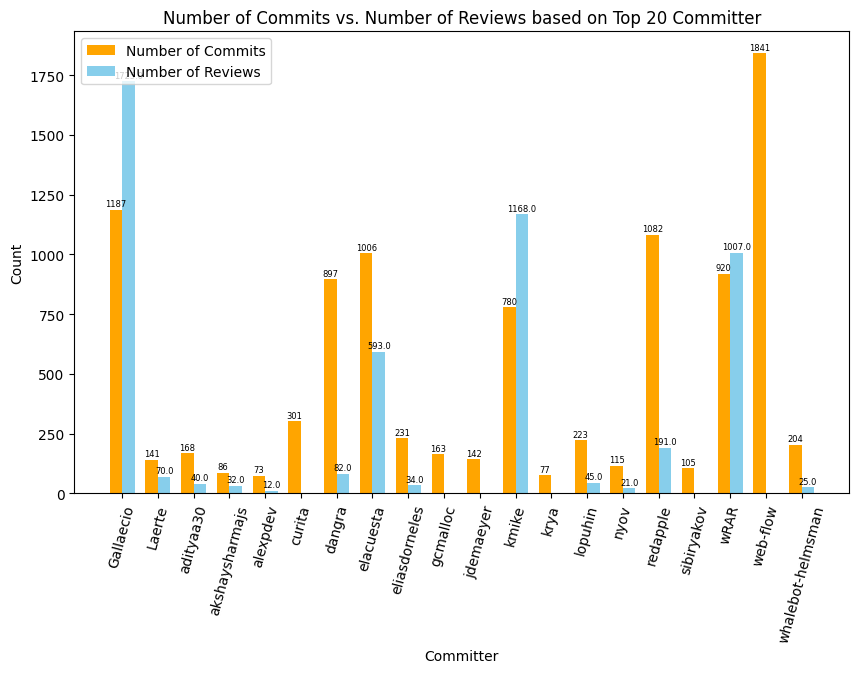

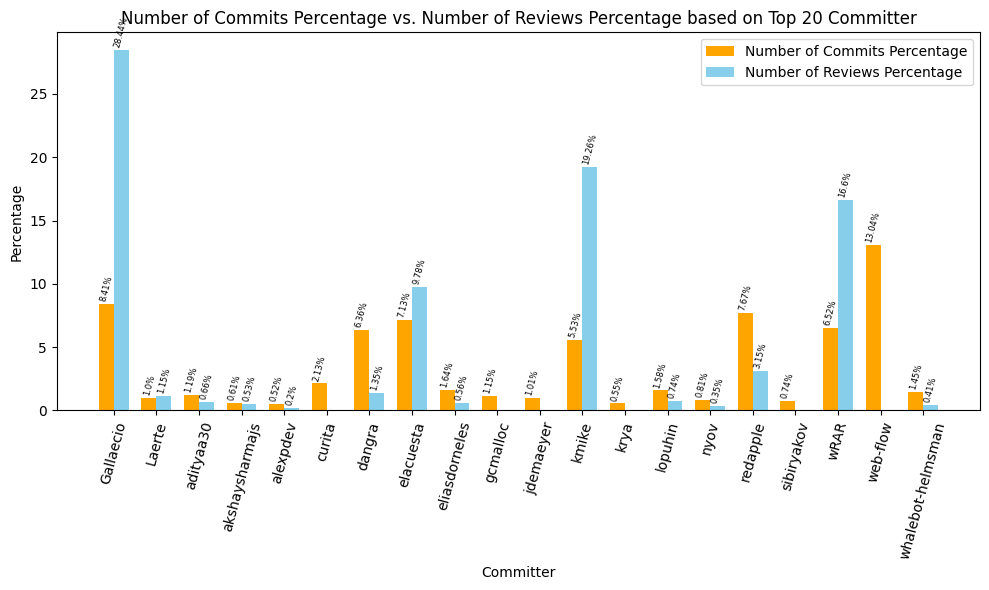

In [ ]:
# NUMBER OF COMMITS VS NUMBER OF REVIEWS BASED ON TOP 20 COMMITTERS
# AND ITS PERCENTAGE OF TOTAL NUMBER OF COMMITS AND REVIEWS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file1_path = 'scrapy_reviews.csv'
data_reviews = pd.read_csv(file1_path)
file2_path = 'scrapy_commits.csv'
data_commits = pd.read_csv(file2_path)

# Calculate total reviews per reviewer
total_reviews = data_reviews.groupby('Reviewer').size()

# Calculate total commits per committer
total_commits = data_commits.groupby('Committer').size()
# print(total_commits)

# Get the top 20 committers
top_20_committers = total_commits.nlargest(20)
# print(top_20_reviewers)

# Calculate the percentage of commits by each top 20 committer
top_20_committers_per = ((top_20_committers / total_commits.sum() ) * 100).round(2)

# Get the number of reviews based on the top 20 committers
top20committers_reviews = total_reviews[total_reviews.index.isin(top_20_committers.index)]

# Calculate the percentage of reviews by each top 20 committer
top20committers_reviews_per = ((top20committers_reviews / total_reviews.sum() ) * 100).round(2)

# Combine both into a DataFrame
df1 = pd.DataFrame({
    'Number of Commits': top_20_committers,
    'Number of Reviews': top20committers_reviews
}).reset_index().rename(columns={'index': 'Committer'})

df2 = pd.DataFrame({
    'Number of Commits Percentage': top_20_committers_per,
    'Number of Reviews Percentage': top20committers_reviews_per
}).reset_index().rename(columns={'index': 'Committer'})


# Define plot positions
x = np.arange(len(df1['Committer']))  # the label locations
width = 0.35  # the width of the bars

xx = np.arange(len(df2['Committer']))  # the label locations
width = 0.35  # the width of the bars

# Plot 1
fig1, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df1['Number of Commits'], width, label='Number of Commits', color='orange')
bars2 = ax.bar(x + width/2, df1['Number of Reviews'], width, label='Number of Reviews', color='skyblue')

# Add labels and title
ax.set_xlabel('Committer')
ax.set_ylabel('Count')
ax.set_title('Number of Commits vs. Number of Reviews based on Top 20 Committer')
ax.set_xticks(x)
ax.set_xticklabels(df1['Committer'], rotation=75)
ax.legend()


# Annotate bars with values, avoiding annotations for zero height
for bar in bars1.patches:  # Access individual bars in the BarContainer
    height = bar.get_height()

    # Only annotate if height is greater than 0
    if height > 0:
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # Adjust position to avoid collision with bar
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6)
    else:
        # Optionally, you can annotate zero values differently or skip
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, 1),  # Slightly offset if zero
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
                textcoords="offset points", ha='center', va='bottom', fontsize=6)


# Plot 2
fig2, axx = plt.subplots(figsize=(10, 6))
bars1_per = axx.bar(xx - width/2, df2['Number of Commits Percentage'], width, label='Number of Commits Percentage', color='orange')
bars2_per = axx.bar(xx + width/2, df2['Number of Reviews Percentage'], width, label='Number of Reviews Percentage', color='skyblue')

# Add labels and title
axx.set_xlabel('Committer')
axx.set_ylabel('Percentage')
axx.set_title('Number of Commits Percentage vs. Number of Reviews Percentage based on Top 20 Committer')
axx.set_xticks(xx)
axx.set_xticklabels(df2['Committer'])
axx.legend()


# Annotate bars with values, avoiding annotations for zero height
for bar in bars1_per.patches:  # Access individual bars in the BarContainer
    height = bar.get_height()

    # Only annotate if height is greater than 0
    if height > 0:
        axx.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # Adjust position to avoid collision with bar
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6,
                    rotation=75)
    else:
        # Optionally, you can annotate zero values differently or skip
        axx.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, 1),  # Slightly offset if zero
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6,
                    rotation=75)

for bar in bars2_per:
    height = bar.get_height()
    axx.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
                textcoords="offset points", ha='center', va='bottom', fontsize=6, rotation=75)


# Show plot
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()





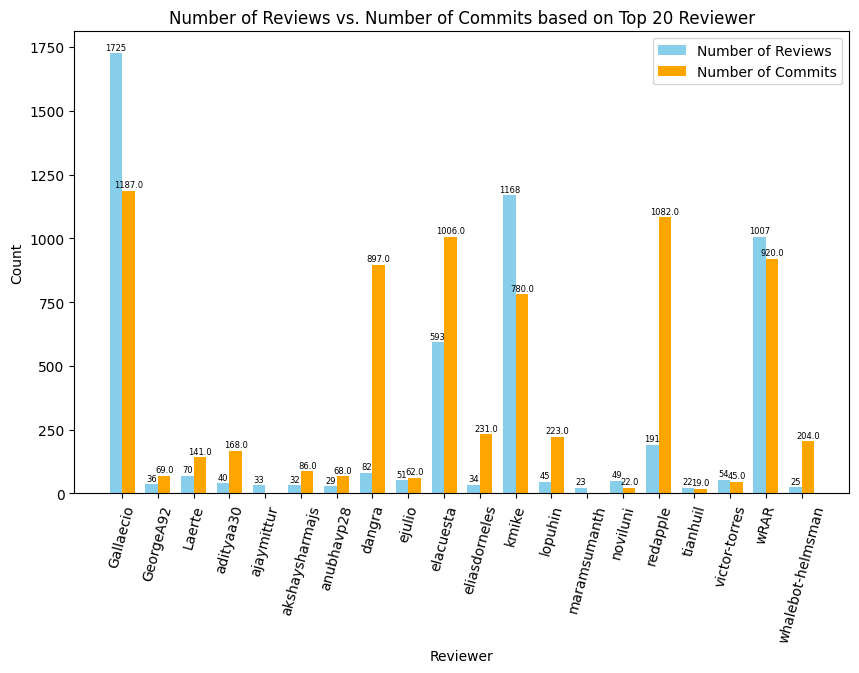

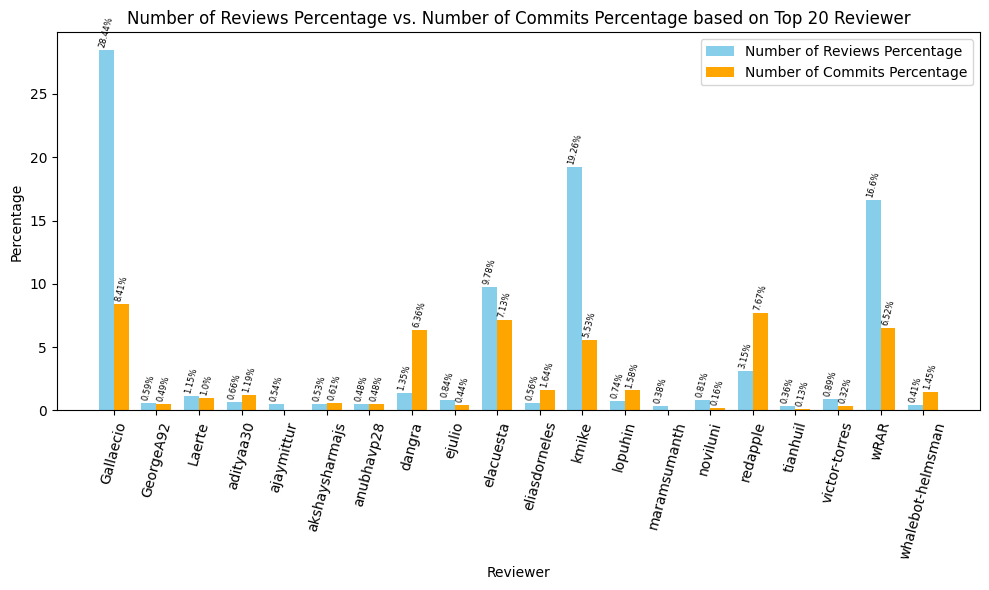

In [ ]:
# NUMBER OF REVIEWS VS NUMBER OF COMMITS BASED ON TOP 20 REVIEWERS
# AND ITS PERCENTAGE OF TOTAL NUMBER OF REVIEWS AND COMMITS

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file1_path = 'scrapy_reviews.csv'
data_reviews = pd.read_csv(file1_path)
file2_path = 'scrapy_commits.csv'
data_commits = pd.read_csv(file2_path)

# Calculate total reviews per reviewer
total_reviews = data_reviews.groupby('Reviewer').size()

# Calculate total commits per committer
total_commits = data_commits.groupby('Committer').size()

# Get the top 20 reviewers
top_20_reviewers = total_reviews.nlargest(20)

# Calculate the percentage of reviews by each top 20 reviewers
top_20_reviewers_per = ((top_20_reviewers / total_reviews.sum() ) * 100).round(2)

# Get the number of commits based on the top 20 reviewers
top20reviewers_commits = total_commits[total_commits.index.isin(top_20_reviewers.index)]

# Calculate the percentage of commits by each top 20 reviewers
top20reviewers_commits_per = ((top20reviewers_commits / total_commits.sum() ) * 100).round(2)

# Combine both into a DataFrame
df1 = pd.DataFrame({
    'Number of Reviews': top_20_reviewers,
    'Number of Commits': top20reviewers_commits
}).reset_index().rename(columns={'index': 'Reviewer'})

df2 = pd.DataFrame({
    'Number of Reviews Percentage': top_20_reviewers_per,
    'Number of Commits Percentage': top20reviewers_commits_per
}).reset_index().rename(columns={'index': 'Reviewer'})


# Define plot positions
x = np.arange(len(df1['Reviewer']))  # the label locations
width = 0.35  # the width of the bars

xx = np.arange(len(df2['Reviewer']))  # the label locations
width = 0.35  # the width of the bars

# Plot 1
fig1, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df1['Number of Reviews'], width, label='Number of Reviews', color='skyblue')
bars2 = ax.bar(x + width/2, df1['Number of Commits'], width, label='Number of Commits', color='orange')

# Add labels and title
ax.set_xlabel('Reviewer')
ax.set_ylabel('Count')
ax.set_title('Number of Reviews vs. Number of Commits based on Top 20 Reviewer')
ax.set_xticks(x)
ax.set_xticklabels(df1['Reviewer'], rotation=75)
ax.legend()


# Annotate bars with values, avoiding annotations for zero height
for bar in bars1.patches:  # Access individual bars in the BarContainer
    height = bar.get_height()

    # Only annotate if height is greater than 0
    if height > 0:
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # Adjust position to avoid collision with bar
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6)
    else:
        # Optionally, you can annotate zero values differently or skip
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, 1),  # Slightly offset if zero
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6)

for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
                textcoords="offset points", ha='center', va='bottom', fontsize=6)


# Plot 2
fig2, axx = plt.subplots(figsize=(10, 6))
bars1_per = axx.bar(xx - width/2, df2['Number of Reviews Percentage'], width, label='Number of Reviews Percentage', color='skyblue')
bars2_per = axx.bar(xx + width/2, df2['Number of Commits Percentage'], width, label='Number of Commits Percentage', color='orange')

# Add labels and title
axx.set_xlabel('Reviewer')
axx.set_ylabel('Percentage')
axx.set_title('Number of Reviews Percentage vs. Number of Commits Percentage based on Top 20 Reviewer')
axx.set_xticks(xx)
axx.set_xticklabels(df2['Reviewer'])
axx.legend()


# Annotate bars with values, avoiding annotations for zero height
for bar in bars1_per.patches:  # Access individual bars in the BarContainer
    height = bar.get_height()

    # Only annotate if height is greater than 0
    if height > 0:
        axx.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # Adjust position to avoid collision with bar
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6,
                    rotation=75)
    else:
        # Optionally, you can annotate zero values differently or skip
        axx.annotate(f'{height}%',
                    xy=(bar.get_x() + bar.get_width() / 2, 1),  # Slightly offset if zero
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=6,
                    rotation=75)

for bar in bars2_per:
    height = bar.get_height()
    axx.annotate(f'{height}%', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
                textcoords="offset points", ha='center', va='bottom', fontsize=6, rotation=75)


# Show plot
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()





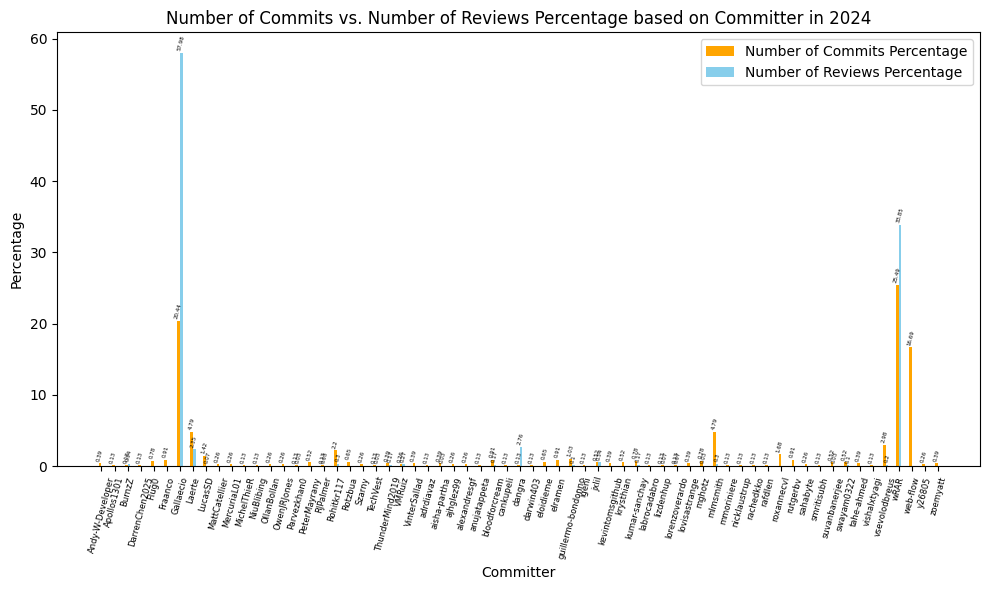

In [1]:
# NUMBER OF COMMITS VS NUMBER OF REVIEWS BASED ON ALL COMMITTERS IN 2024

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the data
file1_path = 'scrapy_reviews.csv'
data_reviews = pd.read_csv(file1_path)
file2_path = 'scrapy_commits.csv'
data_commits = pd.read_csv(file2_path)

# Calculate total reviews per reviewer
total_reviews = data_reviews.groupby('Reviewer').size()

# Calculate total commits per committer
total_commits = data_commits.groupby('Committer').size()
# print(total_commits)

# Extract the year from the `Date of Committed` column
data_commits['year'] = data_commits['Date of Committed'].str[:4]  # Get the first 4 characters as the year

# Filter data for the year 2024
data_2024 = data_commits[data_commits['year'] == '2024']

# Group by committer and count the occurrences for 2024
commits_2024 = data_2024.groupby(['Committer']).size()

# Percentage of commits_2024
commits_2024_per = ((commits_2024 / commits_2024.sum() ) * 100).round(2)

# Get the number of reviews based on commiters in 2024
committers2024_reviews = total_reviews[total_reviews.index.isin(commits_2024.index)]

# Percentage of committers2024_reviews
committers2024_reviews_per = ((committers2024_reviews / committers2024_reviews.sum() ) * 100).round(2)

# Combine both into a DataFrame
df = pd.DataFrame({
    'Number of Commits Percentage': commits_2024_per,
    'Number of Reviews Percentage': committers2024_reviews_per
}).reset_index().rename(columns={'index': 'Committer'})



# Define plot positions
x = np.arange(len(df['Committer']))  # the label locations
width = 0.2  # the width of the bars

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bars1 = ax.bar(x - width/2, df['Number of Commits Percentage'], width, label='Number of Commits Percentage', color='orange')
bars2 = ax.bar(x + width/2, df['Number of Reviews Percentage'], width, label='Number of Reviews Percentage', color='skyblue')

# Add labels and title
ax.set_xlabel('Committer')
ax.set_ylabel('Percentage')
ax.set_title('Number of Commits vs. Number of Reviews Percentage based on Committer in 2024')
ax.set_xticks(x)
ax.set_xticklabels(df['Committer'])
ax.legend()


# Annotate bars with values, avoiding annotations for zero height
for bar in bars1.patches:  # Access individual bars in the BarContainer
    height = bar.get_height()

    # Only annotate if height is greater than 0
    if height > 0:
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 1),  # Adjust position to avoid collision with bar
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=4,
                    rotation=75)
    else:
        # Optionally, you can annotate zero values differently or skip
        ax.annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, 1),  # Slightly offset if zero
                    xytext=(0, 1),
                    textcoords="offset points",
                    ha='center',
                    va='bottom',
                    fontsize=4,
                    rotation=75)


for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 1),
                textcoords="offset points", ha='center', va='bottom', fontsize=4, rotation=75)

# Show plot
plt.xticks(rotation=75, fontsize=6)
plt.tight_layout()
plt.show()



